In [1]:
import pandas as pd
import seaborn as sns


In [2]:
df_first = pd.read_csv("/Users/tk/Documents/stock.adj_close.csv")
df_first.head()

Symbol  2018-06-01  2018-06-04  2018-06-05  2018-06-07  2018-06-08  \
0  A000020     11550.0     11750.0     11700.0     11650.0     11500.0   
1  A000030     15500.0     15950.0     16050.0     16500.0     16600.0   
2  A000040      2992.0      3021.0      3025.0      3069.0      3045.0   
3  A000050     13200.0     13550.0     13600.0     13800.0     13800.0   
4  A000060     20050.0     20050.0     20150.0     20050.0     20400.0   

   2018-06-11  2018-06-12  2018-06-14  2018-06-15  ...  2020-09-07  \
0     11500.0     11650.0     12000.0     11800.0  ...     25550.0   
1     16650.0     16850.0     16500.0     16100.0  ...     14800.0   
2      2984.0      2976.0      3033.0      3033.0  ...       980.0   
3     13800.0     13650.0     13850.0     14500.0  ...     11100.0   
4     20150.0     20700.0     20950.0     20150.0  ...     12700.0   

   2020-09-08  2020-09-09  2020-09-10  2020-09-11  2020-09-14  2020-09-15  \
0     23650.0     24550.0     25950.0     26750.0     26300.0     25400.0   
1     14800.0     14800.0     14800.0     14800.0     14800.0     14800.0   
2       932.0       741.0       875.0       840.0       860.0       833.0   
3     11350.0     11550.0     11500.0     11550.0     11300.0     11300.0   
4     12700.0     12650.0     12700.0     12800.0     13000.0     13200.0   

   2020-09-16  2020-09-17  2020-09-18  
0     25050.0     25300.0     25050.0  
1     14800.0     14800.0     14800.0  
2       817.0       812.0       796.0  
3     11050.0     10900.0     10750.0  
4     13150.0     13150.0     13200.0  

[5 rows x 569 columns]

In [3]:
df_first.columns.name = "date"

In [4]:
df = df_first.melt(id_vars="Symbol")
df

Symbol        date    value
0        A000020  2018-06-01  11550.0
1        A000030  2018-06-01  15500.0
2        A000040  2018-06-01   2992.0
3        A000050  2018-06-01  13200.0
4        A000060  2018-06-01  20050.0
...          ...         ...      ...
1291627  A950160  2020-09-18   8010.0
1291628  A950170  2020-09-18   4055.0
1291629  A950180  2020-09-18  13450.0
1291630  A950190  2020-09-18  30350.0
1291631  A950200  2020-09-18  14550.0

[1291632 rows x 3 columns]

In [5]:
group = df.groupby(["Symbol", "date"])["value"].sum()
group

Symbol   date      
A000020  2018-06-01    11550.0
         2018-06-04    11750.0
         2018-06-05    11700.0
         2018-06-07    11650.0
         2018-06-08    11500.0
                        ...   
A950200  2020-09-14    17450.0
         2020-09-15    15800.0
         2020-09-16    15100.0
         2020-09-17    14700.0
         2020-09-18    14550.0
Name: value, Length: 1291632, dtype: float64

In [6]:
group.index

MultiIndex([('A000020', '2018-06-01'),
            ('A000020', '2018-06-04'),
            ('A000020', '2018-06-05'),
            ('A000020', '2018-06-07'),
            ('A000020', '2018-06-08'),
            ('A000020', '2018-06-11'),
            ('A000020', '2018-06-12'),
            ('A000020', '2018-06-14'),
            ('A000020', '2018-06-15'),
            ('A000020', '2018-06-18'),
            ...
            ('A950200', '2020-09-07'),
            ('A950200', '2020-09-08'),
            ('A950200', '2020-09-09'),
            ('A950200', '2020-09-10'),
            ('A950200', '2020-09-11'),
            ('A950200', '2020-09-14'),
            ('A950200', '2020-09-15'),
            ('A950200', '2020-09-16'),
            ('A950200', '2020-09-17'),
            ('A950200', '2020-09-18')],
           names=['Symbol', 'date'], length=1291632)

In [7]:
group_unstack = group.unstack()
group_unstack

date     2018-06-01  2018-06-04  2018-06-05  2018-06-07  2018-06-08  \
Symbol                                                                
A000020     11550.0     11750.0     11700.0     11650.0     11500.0   
A000030     15500.0     15950.0     16050.0     16500.0     16600.0   
A000040      2992.0      3021.0      3025.0      3069.0      3045.0   
A000050     13200.0     13550.0     13600.0     13800.0     13800.0   
A000060     20050.0     20050.0     20150.0     20050.0     20400.0   
...             ...         ...         ...         ...         ...   
A950160     38600.0     36400.0     36350.0     38700.0     40200.0   
A950170     13850.0     14250.0     14450.0     14300.0     14150.0   
A950180         0.0         0.0         0.0         0.0         0.0   
A950190         0.0         0.0         0.0         0.0         0.0   
A950200         0.0         0.0         0.0         0.0         0.0   

date     2018-06-11  2018-06-12  2018-06-14  2018-06-15  2018-06-18  ...  \
Symbol                                                               ...   
A000020     11500.0     11650.0     12000.0     11800.0     11450.0  ...   
A000030     16650.0     16850.0     16500.0     16100.0     16350.0  ...   
A000040      2984.0      2976.0      3033.0      3033.0      3017.0  ...   
A000050     13800.0     13650.0     13850.0     14500.0     14550.0  ...   
A000060     20150.0     20700.0     20950.0     20150.0     20900.0  ...   
...             ...         ...         ...         ...         ...  ...   
A950160     39250.0     38300.0     38350.0     39000.0     37600.0  ...   
A950170     13650.0     14050.0     13600.0     13550.0     11900.0  ...   
A950180         0.0         0.0         0.0         0.0         0.0  ...   
A950190         0.0         0.0         0.0         0.0         0.0  ...   
A950200         0.0         0.0         0.0         0.0         0.0  ...   

date     2020-09-07  2020-09-08  2020-09-09  2020-09-10  2020-09-11  \
Symbol                                                                
A000020     25550.0     23650.0     24550.0     25950.0     26750.0   
A000030     14800.0     14800.0     14800.0     14800.0     14800.0   
A000040       980.0       932.0       741.0       875.0       840.0   
A000050     11100.0     11350.0     11550.0     11500.0     11550.0   
A000060     12700.0     12700.0     12650.0     12700.0     12800.0   
...             ...         ...         ...         ...         ...   
A950160      9540.0      9540.0      9540.0      9540.0      9540.0   
A950170      4040.0      4050.0      4245.0      4275.0      4200.0   
A950180     13200.0     13150.0     13100.0     13150.0     13100.0   
A950190     32200.0     31200.0     30400.0     30500.0     30150.0   
A950200     16750.0     16950.0     17250.0     17100.0     17350.0   

date     2020-09-14  2020-09-15  2020-09-16  2020-09-17  2020-09-18  
Symbol                                                               
A000020     26300.0     25400.0     25050.0     25300.0     25050.0  
A000030     14800.0     14800.0     14800.0     14800.0     14800.0  
A000040       860.0       833.0       817.0       812.0       796.0  
A000050     11300.0     11300.0     11050.0     10900.0     10750.0  
A000060     13000.0     13200.0     13150.0     13150.0     13200.0  
...             ...         ...         ...         ...         ...  
A950160      9540.0      9540.0      9540.0      8010.0      8010.0  
A950170      4195.0      4070.0      4045.0      4015.0      4055.0  
A950180     13900.0     13250.0     13350.0     13550.0     13450.0  
A950190     30050.0     31450.0     31750.0     31200.0     30350.0  
A950200     17450.0     15800.0     15100.0     14700.0     14550.0  

[2274 rows x 568 columns]

<AxesSubplot:xlabel='Symbol,date'>

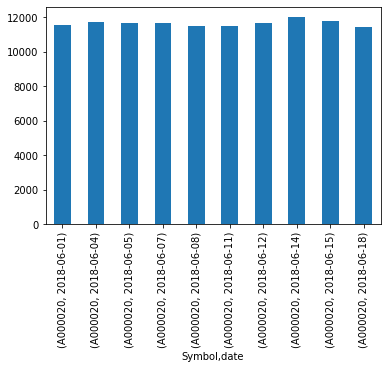

In [8]:
group[:10].plot.bar()

<AxesSubplot:xlabel='Symbol'>

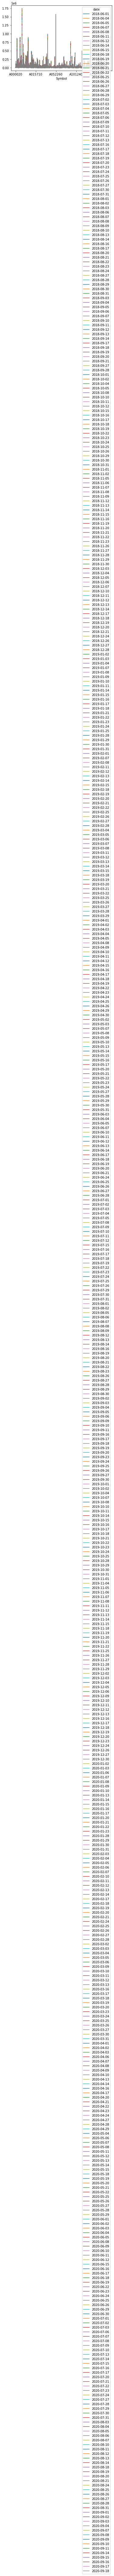

In [9]:
group_unstack.plot.line()

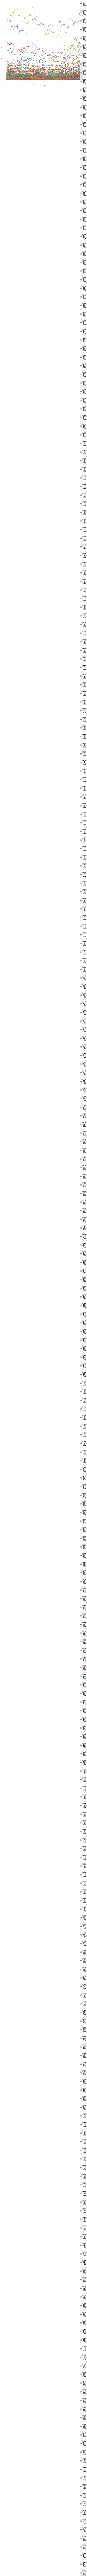

In [10]:
gdf = group_unstack.transpose().plot(figsize=(20, 20))

In [12]:
pip install pandas_datareader

  Using cached pandas_datareader-0.9.0-py3-none-any.whl (107 kB)
     |████████████████████████████████| 4.6 MB 2.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


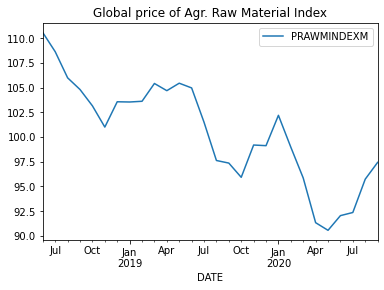

In [13]:
import matplotlib.pyplot as plt
import pandas_datareader.data as web

rmi = web.DataReader('PRAWMINDEXM', 'fred', start = '2018-06-01', end = '2020-09-18')

rmi.plot(title = 'Global price of Agr. Raw Material Index')

plt.show()

In [15]:
pip install quandl

  Using cached Quandl-3.6.1-py2.py3-none-any.whl (26 kB)
  Using cached more_itertools-8.7.0-py3-none-any.whl (48 kB)
  Using cached inflection-0.5.1-py2.py3-none-any.whl (9.5 kB)
Note: you may need to restart the kernel to use updated packages.


In [16]:
import quandl

QUANDL_KEY = 'oEY4by7XiFVhyWsyVYyC' # replace {key} with your own API key  
quandl.ApiConfig.api_key = QUANDL_KEY

df = quandl.get(dataset='WGC/GOLD_MONAVG_USD',
                start_date='2018-06-01', 
                end_date='2020-09-18')

df.rename(columns={'Value': 'price'}, inplace=True)
df = df.resample('M').last()

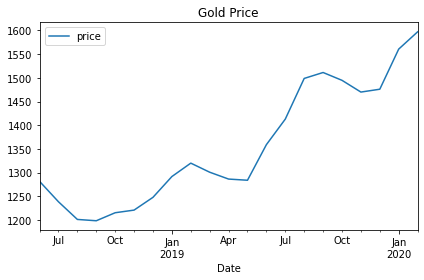

In [17]:
df.plot(title='Gold Price')

plt.tight_layout()
plt.show()